In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

KODEX 200 데이터: 2017년부터 존재
TIGER 코스닥150: 2015-11-12
TIGER 미국나스닥100: 2010-10-18
ARIRANG 미국S&P500(H): 2017-05-16
KODEX 골드선물(H): 2010-10-1
KODEX WTI원유선물(H): 2016-12-27
KOSEF 국고채10년레버리지: 2012-10-30
TIGER 미국채10년선물: 2018-8-30

In [2]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

NameError: name 'mpl' is not defined

In [3]:
%%html
<style>
    table { display: inline-block }
    .rendered_html td, .rendered_html th { text-align: left; }
</style>

In [4]:
import pandas as pd
from pandas import Series, DataFrame

from pandas_datareader import data
from pandas.tseries.offsets import Day, MonthEnd
import numpy as np
import sys
from scipy.stats import rankdata
import FinanceDataReader as fdr
from tqdm import tqdm_notebook

In [17]:
tickers = ['069500', '232080', '133690', '269540', '132030', '261220', '167860', '305080']
tickersName = ['KODEX 200', 'TIGER 코스닥150', 'TIGER 미국나스닥100', 'ARIRANG 미국S&P500(H)', 'KODEX 골드선물(H)', 'KODEX WTI원유선물(H)', 'KOSEF 국고채10년레버리지', 'TIGER 미국채10년선물']
start = '2019'

all_data = {}
for ticker in tqdm_notebook(tickers, desc="ticker종가", mininterval=1):
    all_data[ticker] = fdr.DataReader(ticker,start)

In [18]:
prices = pd.DataFrame({tic: data['Close'] for tic, data in all_data.items()})
prices = prices.fillna(method = 'ffill')

In [19]:
prices.columns = [tickersName]

In [20]:
prices.head()

,KODEX 200,TIGER 코스닥150,TIGER 미국나스닥100,ARIRANG 미국S&P500(H),KODEX 골드선물(H),KODEX WTI원유선물(H),KOSEF 국고채10년레버리지,TIGER 미국채10년선물
Date,,,,,,,,
2019-01-02,26270,11535,31505,10260,9400,16065,131400,10265
2019-01-03,26015,11271,31235,10240,9440,16280,131400,10390
2019-01-04,26215,11480,31325,10245,9460,16925,130710,10390
2019-01-07,26590,11565,32340,10555,9425,17410,130820,10305
2019-01-08,26415,11425,32805,10620,9380,17330,130525,10335


In [22]:
prices['KODEX 200'].resample('BM').last()

,KODEX 200
Date,
2007-01-31,14837
2007-02-28,15507
2007-03-30,15923
2007-04-30,16788
2007-05-31,18291
2007-06-29,18760
2007-07-31,20756
2007-08-31,20294
2007-09-28,20952


In [12]:
prices_corr = prices.pct_change().dropna().corr()

In [13]:
prices_corr

,KODEX 200,TIGER 코스닥150,TIGER 미국나스닥100,ARIRANG 미국S&P500(H),KODEX 골드선물(H),KODEX WTI원유선물(H),KOSEF 국고채10년레버리지,TIGER 미국채10년선물
KODEX 200,1.000000,0.718973,0.550842,0.622350,-0.026880,0.291646,-0.419561,-0.679271
TIGER 코스닥150,0.718973,1.000000,0.277093,0.392148,0.145901,0.086424,-0.399265,-0.625819
TIGER 미국나스닥100,0.550842,0.277093,1.000000,0.865629,-0.260509,0.376877,-0.161960,-0.395607
ARIRANG 미국S&P500(H),0.622350,0.392148,0.865629,1.000000,-0.174699,0.443342,-0.239114,-0.581578
KODEX 골드선물(H),-0.026880,0.145901,-0.260509,-0.174699,1.000000,-0.145572,-0.164413,-0.138755
KODEX WTI원유선물(H),0.291646,0.086424,0.376877,0.443342,-0.145572,1.000000,-0.178858,-0.215653
KOSEF 국고채10년레버리지,-0.419561,-0.399265,-0.161960,-0.239114,-0.164413,-0.178858,1.000000,0.474902
TIGER 미국채10년선물,-0.679271,-0.625819,-0.395607,-0.581578,-0.138755,-0.215653,0.474902,1.000000


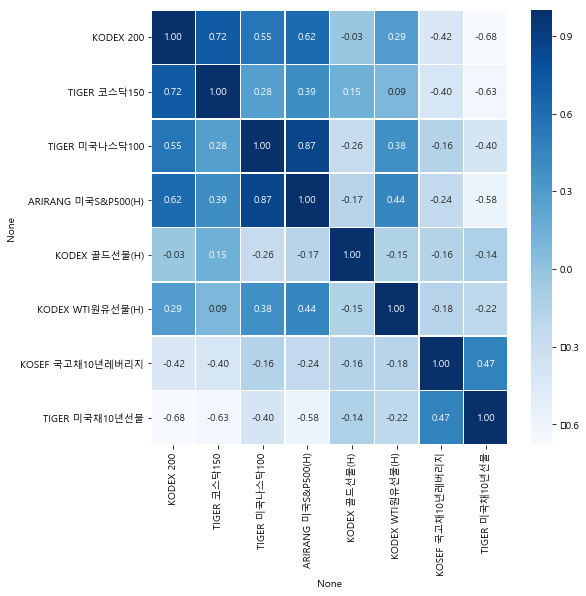

In [14]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(data= prices_corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

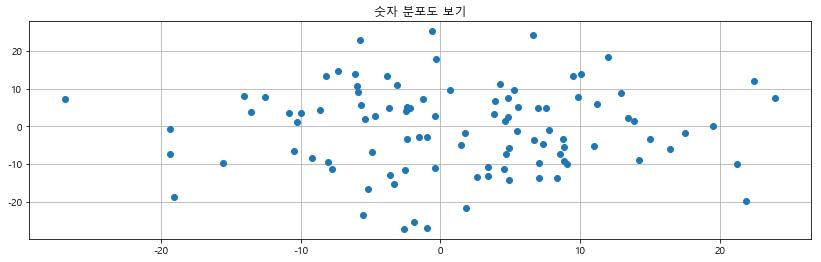

In [45]:
fig, ax = plt.subplots()
ax.plot(10*np.random.randn(100), 10*np.random.randn(100), 'o')
ax.set_title('숫자 분포도 보기')
plt.show()

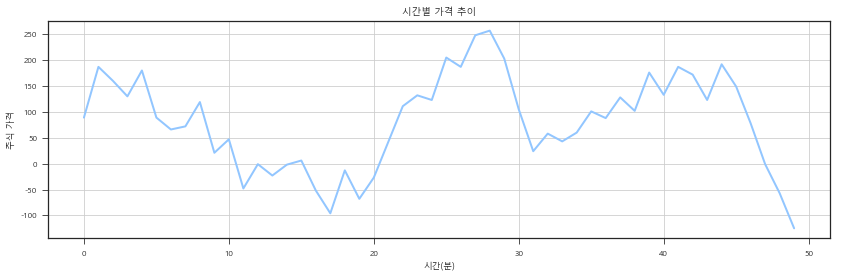

In [59]:
fig, ax = plt.subplots()
ax.plot(np.random.randint(-100, 100, 50).cumsum())
ax.set_title('시간별 가격 추이')
plt.ylabel('주식 가격')
plt.xlabel('시간(분)')
plt.style.use('seaborn-pastel')
plt.show()

In [56]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [62]:
prices.tail()

,KODEX 200,TIGER 코스닥150,TIGER 미국나스닥100,ARIRANG 미국S&P500(H),KODEX 골드선물(H),KODEX WTI원유선물(H),KOSEF 국고채10년레버리지,TIGER 미국채10년선물
Date,,,,,,,,
2019-01-08,26415,11435.0,32805.0,10620.0,9380.0,17330.0,130525.0,10335.0
2019-01-09,26960,11625.0,33170.0,10730.0,9350.0,18010.0,130165.0,10300.0
2019-01-10,26950,11700.0,32850.0,10710.0,9460.0,18420.0,130840.0,10275.0
2019-01-11,27115,11675.0,33000.0,10765.0,9450.0,18775.0,130425.0,10245.0
2019-01-14,26880,11500.0,32805.0,10685.0,9435.0,18155.0,130890.0,10340.0


In [63]:
excel_writer2 = pd.ExcelWriter('C:/programming/data/정적자산배분.xlsx', engine='xlsxwriter')
prices.to_excel(excel_writer2, index=True, sheet_name='raw')
excel_writer2.save()

In [68]:
nas100 = fdr.DataReader('SPGSGCTR','2007')

ValueError: Symbol unsupported or not found

In [ ]:
tickers = ['069500', 'KS50', 'NDX', 'SPX', '132030', '261220', '167860', '305080']
tickersName = ['KODEX 200', '코스닥150', '나스닥100', 'S&P500', '골드선물', 'WTI원유선물', 'KOSEF 국고채10년레버리지', 'TIGER 미국채10년선물']
start = '2007'

all_data = {}
for ticker in tqdm(tickers, desc="ticker종가", mininterval=1):
    all_data[ticker] = fdr.DataReader(ticker,start)

In [5]:
oil = fdr.DataReader('^SPGSCLP','2007')

ValueError: Symbol unsupported or not found